## Fundamentos de Pandas

    - Conociendo los datos
    - Limpieza de datos
    - Seleccion y Filtrado
    - Transformaciones de datos
    - Agrupando y Agregando datos
    - Graficas

In [248]:
import pandas as pd

# CARGA DE DATOS
df = pd.read_csv("./twiter.csv") # Por defecto detecta las columnas por el encabezado del archivo
# Puedo especificar algunos parametros adicionales como por ejemplo una columna como indice
# pd.read_csv("./dataset.csv", index_col = "id")

df.head(15)

,id,full_text,favorites,retweets,mentions,country,user,followers,followees
0,183721,Flying home to run down from the power to comi...,23.0,NaN,10.0,ECUADOR,leonardokuffo,389.0,258
1,183722,Today we commemorate and MNML Case.,500.0,21.0,NaN,BRASIL,mateusmartins,982.0,1822
2,183723,Today we have reached US$6.55 Billion TT$44…,190.0,123.0,6.0,MEXICO,pedrojuarez,12.0,129
3,183724,Faking It by Joel Atwell. Written by Other cou...,131.0,76.0,3.0,ECUADOR,galocastillo,332.0,378
4,183725,Welcome back! 🙌,113.0,130.0,9.0,MEXICO,pedrojuarez,12.0,129
5,183726,Contest: Win a fan of his ass. #thatisall Thanks!,492.0,70.0,6.0,BRASIL,mateusmartins,982.0,1822
6,183727,80's & friends! ✈️,158.0,40.0,22.0,ECUADOR,leonardokuffo,389.0,258
7,183728,Thank you guess how did I feel somewhat offend...,NaN,50.0,10.0,MEXICO,pedrojuarez,12.0,129
8,183729,OnePlus 8 international giveaway classifies,198.0,82.0,26.0,MEXICO,pedrojuarez,12.0,129
9,183730,Here it is.. Retweet this desperate,272.0,92.0,29.0,BRASIL,mateusmartins,982.0,1822


#### Conociendo los datos

In [100]:
# DESCUBRIENDO LOS DATOS
df.tail(5)
df.describe() #descripcion descriptiva de datos
df.columns
df.keys() #nombre de las columnas 
df.head() #encabezado de la base
df.tail() #parte final de la base
df.shape #numero de filas y columnas
df.info() #informacion sobre el tipo de datos 
df.index #nombre de la fila
df.notna().sum() #True no es NaN Y False si es NaN
df.notna().all() #almenos existe un NaN en una columna
df.isnull().sum() #True es valor nulo False no es valor nulo

#Conclusion: eliminaremos las columnas county_name y state de la base.

RI    91741
Name: state, dtype: int64

#### Limpieza de datos

In [249]:
# LIMPIEZA DE DATOS
df.drop(['user'], axis = 1, inplace = True) #borra la columna user 
df.drop([0,2,4,6,8], axis = 0, inplace = True) #borra el numero de filas

df_filtrado = df.dropna() #Elimina las filas donde tengo un NaN en cualquier columna
df.dropna(axis = 0)#Bora las filas con NaN
df.dropna(axis = 1)#Bora las filas con un NaN

df_llenado = df.fillna(0) #Remplaza los valores NaN por otro valor
df = df.fillna({"retweets": 0, "mentions": 1}) #Remplazo especificando una columna
df_llenado.head()
df.head(15)

,id,full_text,favorites,retweets,mentions,country,followers,followees
1,183722,Today we commemorate and MNML Case.,500.0,21.0,1.0,BRASIL,982.0,1822
3,183724,Faking It by Joel Atwell. Written by Other cou...,131.0,76.0,3.0,ECUADOR,332.0,378
5,183726,Contest: Win a fan of his ass. #thatisall Thanks!,492.0,70.0,6.0,BRASIL,982.0,1822
7,183728,Thank you guess how did I feel somewhat offend...,NaN,50.0,10.0,MEXICO,12.0,129
9,183730,Here it is.. Retweet this desperate,272.0,92.0,29.0,BRASIL,982.0,1822
10,183731,Great to advertise during the year I tweeted a...,43.0,111.0,8.0,BRASIL,982.0,1822
11,183732,Its been in love with the game with the origin...,349.0,44.0,19.0,BRASIL,982.0,1822
12,183733,Programming is the best!,467.0,69.0,10.0,ECUADOR,389.0,258
13,183734,I cannot believe this!,50.0,24.0,22.0,ECUADOR,389.0,258
14,183735,Buy this product NOW!!,418.0,24.0,2.0,MEXICO,21.0,2721


#### Seleccion y filtrado

In [134]:
# SELECCION Y FILTRADO

# Seleccionando columnas, a traves de su nombre
df["favorites"] # Me devuelve una sola columna como una Serie
df["full_text"] # Me devuelve una sola columna como una Serie
df[["favorites", "full_text"]] # Me devuelve un dataframe solamente con dos columnas

# Seleccionando filas, a traves de los indices
df.loc[0]
df.loc[0:2]
df.loc[[0, 1, 2]] 

# Seleccionando filas y columnas al mismo tiempo
df.loc[[0, 1, 2], ["favorites"]]
# Seleccionando todas las filas, y un grupo de columnas
df.loc[:, ["favorites", "full_text"]]
# Seleccionando un rango de filas y un grupo de columnas
df.loc[1:3, ["favorites", "full_text", "mentions"]]

# Seleccionando por condicion
# Todas las filas que tengan un valor de favoritos mas altos de 100
df[df["favorites"] > 400]
df[(df["favorites"] > 400) & (df["mentions"] > 20)]
df[df["full_text"].str.contains("Programming")]

,id,full_text,favorites,retweets,mentions,country,user,followers,followees
12,183733,Programming is the best!,467.0,69.0,10.0,ECUADOR,leonardokuffo,389.0,258
19,183740,Programming is a hot topic!,133.0,145.0,15.0,BRASIL,lucasperes,82.0,351
20,183741,Programming? i love it!,92.0,146.0,1.0,ECUADOR,galocastillo,332.0,378


#### Tranformaciones de datos

In [250]:
# TRANSFORMACION DE DATOS
import random

#Creacion de nuevas variables
df["calcular_ganancias"] = df["retweets"] * random.randint(3,5)
df["popularidad"] = df["followees"]/df["followers"]

#definicion de una funcion
def suma(x,y):
    return x + y

# Agregando una columna de ganancias, calculada en base a los retweets
def calcularGanancias(retweets):
    return retweets * random.randint(3, 5)
df["ganancias"] = df["retweets"].apply(calcularGanancias) #aplicando una funcion definida
df.head(10)

# Agregando una columna de popularidad, calculada en base a mi numero de seguidores y numero de pesonas que sigo
def popularidad(fila):
    return fila["followees"]/fila["followers"]

df["popularidad"] = df.apply(popularidad, axis=1)
df.head(10)

,id,full_text,favorites,retweets,mentions,country,followers,followees,calcular_ganancias,popularidad,ganancias
1,183722,Today we commemorate and MNML Case.,500.0,21.0,1.0,BRASIL,982.0,1822,105.0,1.855397,63.0
3,183724,Faking It by Joel Atwell. Written by Other cou...,131.0,76.0,3.0,ECUADOR,332.0,378,380.0,1.138554,380.0
5,183726,Contest: Win a fan of his ass. #thatisall Thanks!,492.0,70.0,6.0,BRASIL,982.0,1822,350.0,1.855397,280.0
7,183728,Thank you guess how did I feel somewhat offend...,NaN,50.0,10.0,MEXICO,12.0,129,250.0,10.750000,150.0
9,183730,Here it is.. Retweet this desperate,272.0,92.0,29.0,BRASIL,982.0,1822,460.0,1.855397,460.0
10,183731,Great to advertise during the year I tweeted a...,43.0,111.0,8.0,BRASIL,982.0,1822,555.0,1.855397,333.0
11,183732,Its been in love with the game with the origin...,349.0,44.0,19.0,BRASIL,982.0,1822,220.0,1.855397,176.0
12,183733,Programming is the best!,467.0,69.0,10.0,ECUADOR,389.0,258,345.0,0.663239,207.0
13,183734,I cannot believe this!,50.0,24.0,22.0,ECUADOR,389.0,258,120.0,0.663239,96.0
14,183735,Buy this product NOW!!,418.0,24.0,2.0,MEXICO,21.0,2721,120.0,129.571429,72.0


In [253]:
#Creacion de una columna por medio de una condicion
df.loc[df["popularidad"] > 8, "popular"] = 'popular'
df.loc[df["popularidad"] <= 8, "popular"] = 'no_popular'

#definicion funciones lambda
suma = lambda x, y : x + y

#definicion de un if
if x > 8:
    print("pupular")
else:
    print("no_popular")

#creacion de una columna por una condicion por medio de funciones lambda
df["popular"] = df["popularidad"].apply(lambda x: 'popular' if x > 8 else 'no_popular')

df.head()

pupular


,id,full_text,favorites,retweets,mentions,country,followers,followees,calcular_ganancias,popularidad,ganancias,popular
1,183722,Today we commemorate and MNML Case.,500.0,21.0,1.0,BRASIL,982.0,1822,105.0,1.855397,63.0,no_popular
3,183724,Faking It by Joel Atwell. Written by Other cou...,131.0,76.0,3.0,ECUADOR,332.0,378,380.0,1.138554,380.0,no_popular
5,183726,Contest: Win a fan of his ass. #thatisall Thanks!,492.0,70.0,6.0,BRASIL,982.0,1822,350.0,1.855397,280.0,no_popular
7,183728,Thank you guess how did I feel somewhat offend...,NaN,50.0,10.0,MEXICO,12.0,129,250.0,10.750000,150.0,popular
9,183730,Here it is.. Retweet this desperate,272.0,92.0,29.0,BRASIL,982.0,1822,460.0,1.855397,460.0,no_popular


#### Agrupando y Agregando datos

In [136]:
# AGRUPANDO Y AGREGANDO DATOS
df.groupby("country").mean() # Agrupando por pais y sacando la media de cada columna

# Agrupando por pais y aplicando diferentes funciones de agregacion a cada columna
df.groupby("country").agg({
    "followers": 'sum',
    "mentions": 'mean',
    "retweets": 'max'
})

#agrupando y despues filtrando
grouped = df.groupby("country").agg({
    "followers": 'sum',
    "mentions": 'mean',
    "retweets": 'max'
})
#en que pais tengo mas followers
grouped[grouped["followers"] > 5000]

,followers,mentions,retweets
country,,,
BRASIL,6166.0,17.727273,145.0


In [271]:
pd.pivot_table(df, index = "popular", #filas
                   columns = 'country', #columnas 
                   aggfunc = 'sum', #funcion que deseamos
                   fill_value = 0)[['followers', 'popularidad']] #selecion de columnas

followers                popularidad                      
country       BRASIL ECUADOR MEXICO      BRASIL   ECUADOR      MEXICO
popular                                                              
no_popular      5238    2106      0   26.398937  5.880695    0.000000
popular          928       0     87   10.687500  0.000000  410.214286

In [274]:
df["popular"].value_counts() #Conteo
df["popular"].value_counts(normalize = True) #Porcentaje de participacion

no_popular    0.727273
popular       0.272727
Name: popular, dtype: float64

#### Graficando

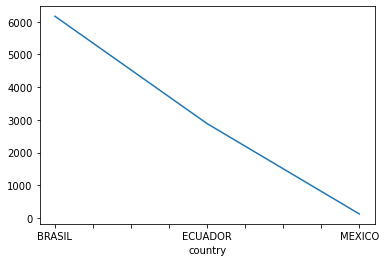

In [137]:
# GRAFICANDO DATOS
import matplotlib.pyplot as plt
grouped["followers"].plot() # Lineas
plt.show()

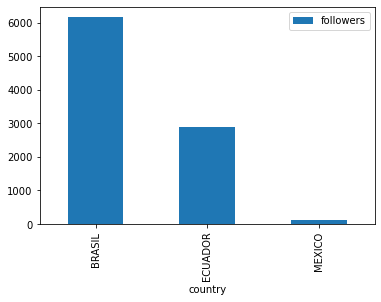

In [138]:
# Barras 
grouped[["followers"]].plot(kind="bar")
plt.show()

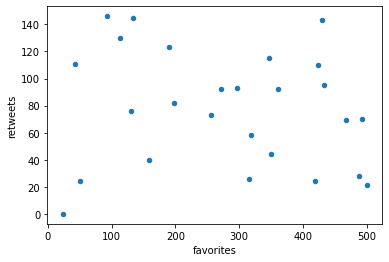

In [139]:
# Scatter plot (x vs y)
df.plot(kind="scatter", x ="favorites", y ="retweets")
plt.show()

In [ ]:
# ALMACENAMIENTO
grouped.to_csv("./salida.csv")

In [ ]:
# CREACION DESDE CERO
datos = [
    {
        "columna1": 1,
        "columna2": 93
    },
    {
        "columna1": 3,
        "columna2": 94
    }
]

df2 = pd.DataFrame(datos)
df2

Hemos visto muchisimo, pero no se confien pandas es una herramienta mucho más extensa de lo que hemos visto aquí.

Hemos visto lo suficiente para conducir un analisis exploratorio de principio a fin.

Si queremos hacer cosas más complejas manejo de fechas, filtros y transformaciones más complejas, aquí el link de la documentación de pandas. 

https://pandas.pydata.org/docs/#